In [2]:
!pip install pandas


   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.7 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.7 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.7 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.7 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.7 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.7 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.7 MB 1.0 MB/s eta 0:00:08
   --------- ------------------------------ 2.4/9.7 MB 1.0 MB/s eta 0:00:08
   ---------- --------------------------

In [15]:
!pip install matplotlib

In [17]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [19]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 3.1 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.0 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.0 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 3.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 3.0 MB/s eta 0:00:01
   -----------------------

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("startup data.csv")

In [4]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
df.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,1/1/2003,NaN,2/13/2006,2/13/2006,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,CA,1,0,0,0,0,security,0,0,0,0,0,0,0,0,0,1,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    str    
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    str    
 5   id                        923 non-null    str    
 6   city                      923 non-null    str    
 7   Unnamed: 6                430 non-null    str    
 8   name                      923 non-null    str    
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    str    
 11  closed_at                 335 non-null    str    
 12  first_funding_at          923 non-null    str    
 13  last_funding_at           923 non-null    str    
 14  age_first_funding_yea

In [7]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [8]:
df.shape

(923, 49)

In [9]:
df.isnull()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
919,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
920,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
921,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

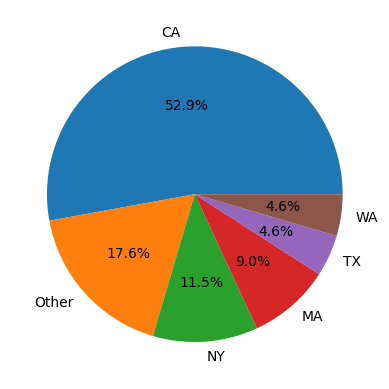

In [11]:
df['State'] = 'Other'
df.loc[(df['state_code'] == 'CA'), 'State'] = 'CA'
df.loc[(df['state_code'] == 'NY'), 'State'] = 'NY'
df.loc[(df['state_code'] == 'MA'), 'State'] = 'MA'
df.loc[(df['state_code'] == 'TX'), 'State'] = 'TX'
df.loc[(df['state_code'] == 'WA'), 'State'] = 'WA'

state_count = df['State'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.show()


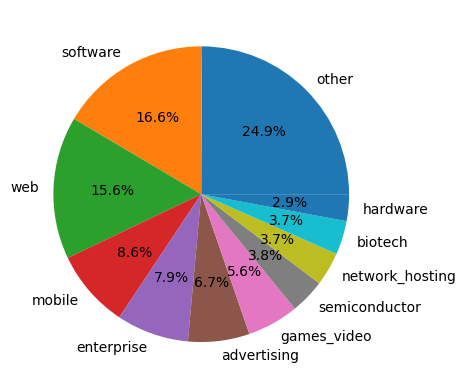

In [12]:
df['category'] = 'other'
df.loc[(df['category_code'] == 'software'), 'category'] = 'software'
df.loc[(df['category_code'] == 'web'), 'category'] = 'web'
df.loc[(df['category_code'] == 'mobile'), 'category'] = 'mobile'
df.loc[(df['category_code'] == 'enterprise'), 'category'] = 'enterprise'
df.loc[(df['category_code'] == 'advertising'), 'category'] = 'advertising'
df.loc[(df['category_code'] == 'games_video'), 'category'] = 'games_video'
df.loc[(df['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
df.loc[(df['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
df.loc[(df['category_code'] == 'biotech'), 'category'] = 'biotech'
df.loc[(df['category_code'] == 'hardware'), 'category'] = 'hardware'

category_count = df['category'].value_counts()
plt.pie(category_count, labels=category_count.index, autopct='%1.1f%%')
plt.show()


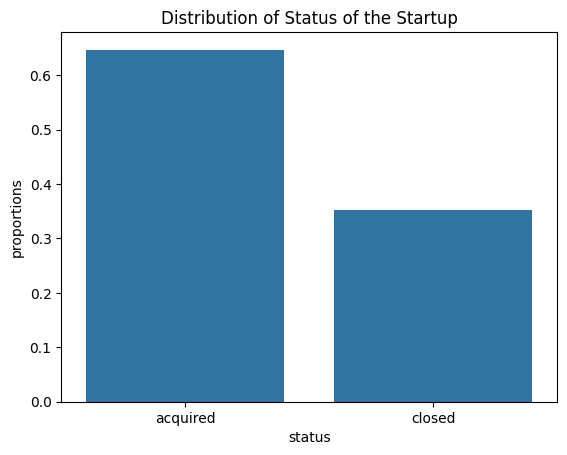

In [13]:
prop_df = df.groupby('status').size().reset_index(name='counts')
prop_df['proportions'] = prop_df['counts'] / prop_df['counts'].sum()

sns.barplot(data=prop_df, x='status', y='proportions')
plt.title('Distribution of Status of the Startup')
plt.show()


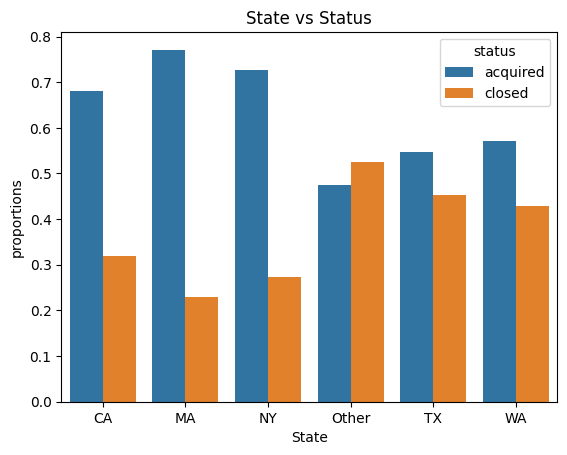

In [14]:
prop_df = df.groupby(['State', 'status']).size().reset_index(name='count')

prop_df['proportions'] = prop_df.groupby('State')['count']\
                                .transform(lambda x: x / x.sum())

sns.barplot(data=prop_df, x='State', y='proportions', hue='status')
plt.title('State vs Status')
plt.show()


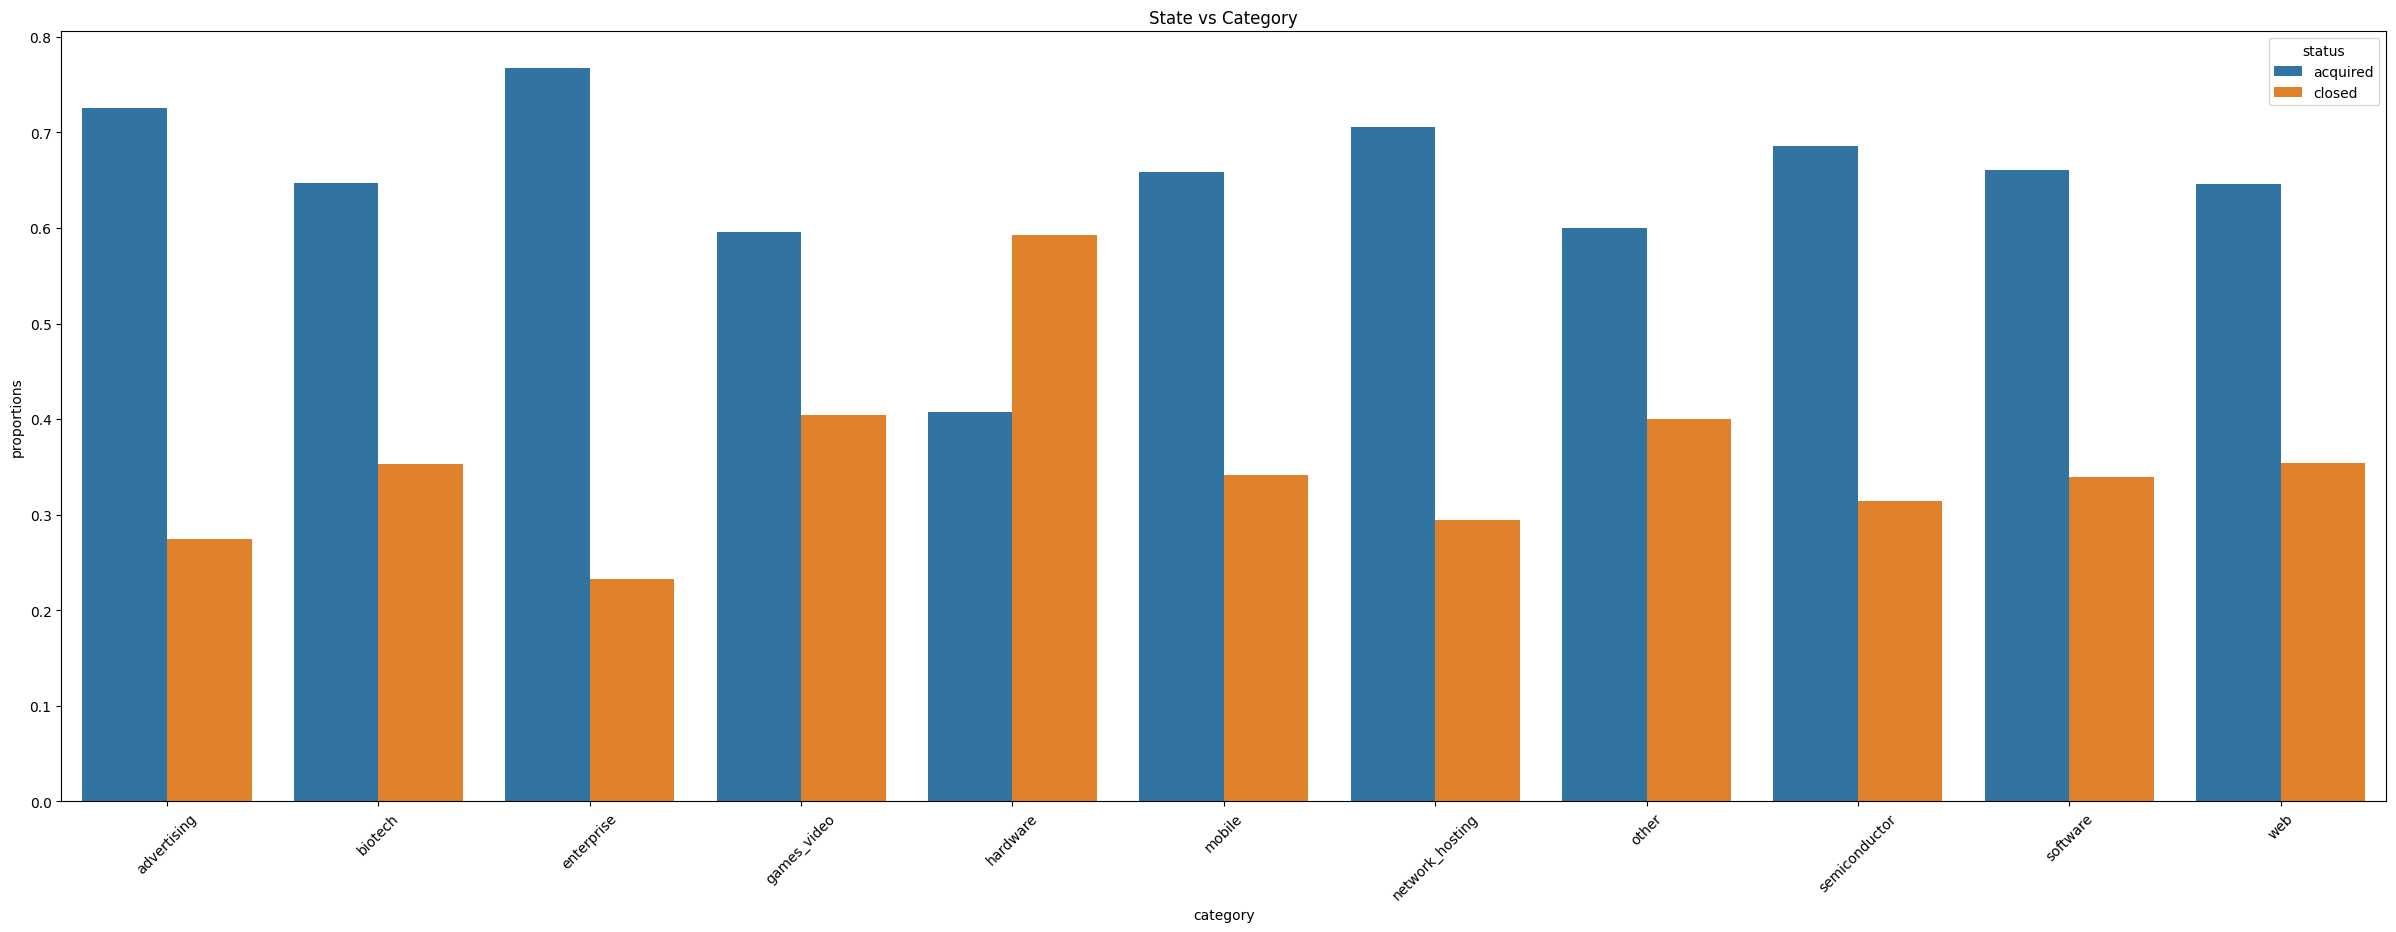

In [15]:
fig, ax = plt.subplots(figsize=(30, 10))

prop_df = df.groupby(['category', 'status']).size().reset_index(name='counts')

prop_df['proportions'] = prop_df.groupby('category')['counts'] \
                                .transform(lambda x: x / x.sum())

sns.barplot(data=prop_df, x='category', y='proportions', hue='status')

plt.title('State vs Category')
plt.xticks(rotation=45)
plt.show()


In [16]:
df['founded_year'] = pd.to_datetime(df['founded_at']).dt.year


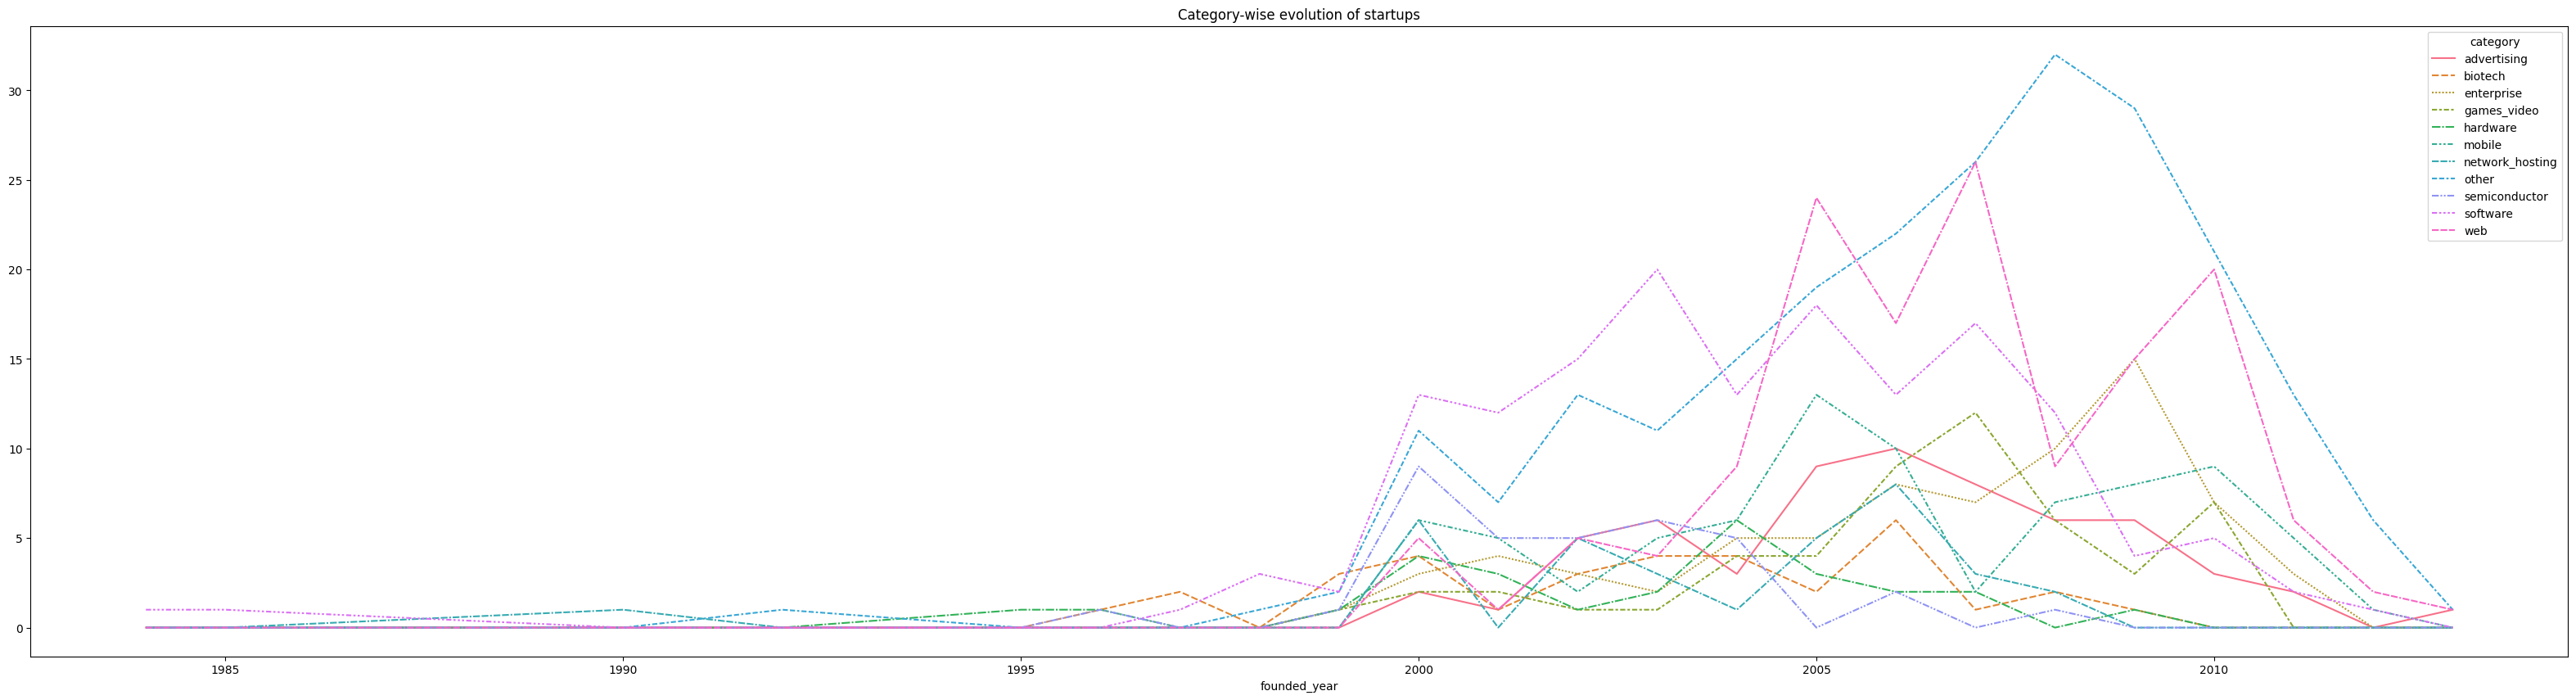

In [17]:
cat_year = pd.crosstab(index=df['founded_year'], columns=df['category'])

fig, ax = plt.subplots(figsize=(40, 10))

sns.lineplot(data=cat_year, ax=ax)

plt.title('Category-wise evolution of startups')
plt.show()


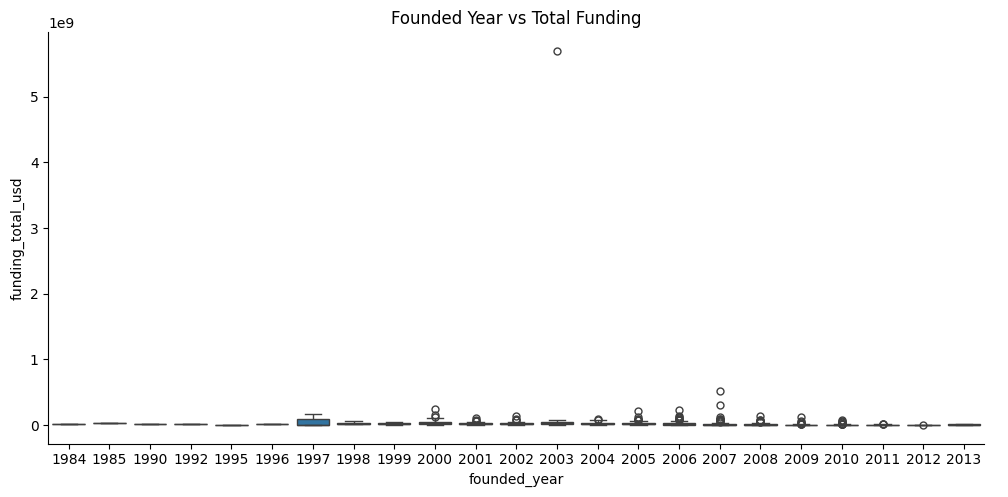

In [18]:
sns.catplot(
    data=df,
    x='founded_year',
    y='funding_total_usd',
    kind='box',
    height=5,
    aspect=2,
    order=[
        '1984', '1985', '1990', '1992', '1995',
        '1996', '1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013'
    ]
)

plt.title('Founded Year vs Total Funding')
plt.show()


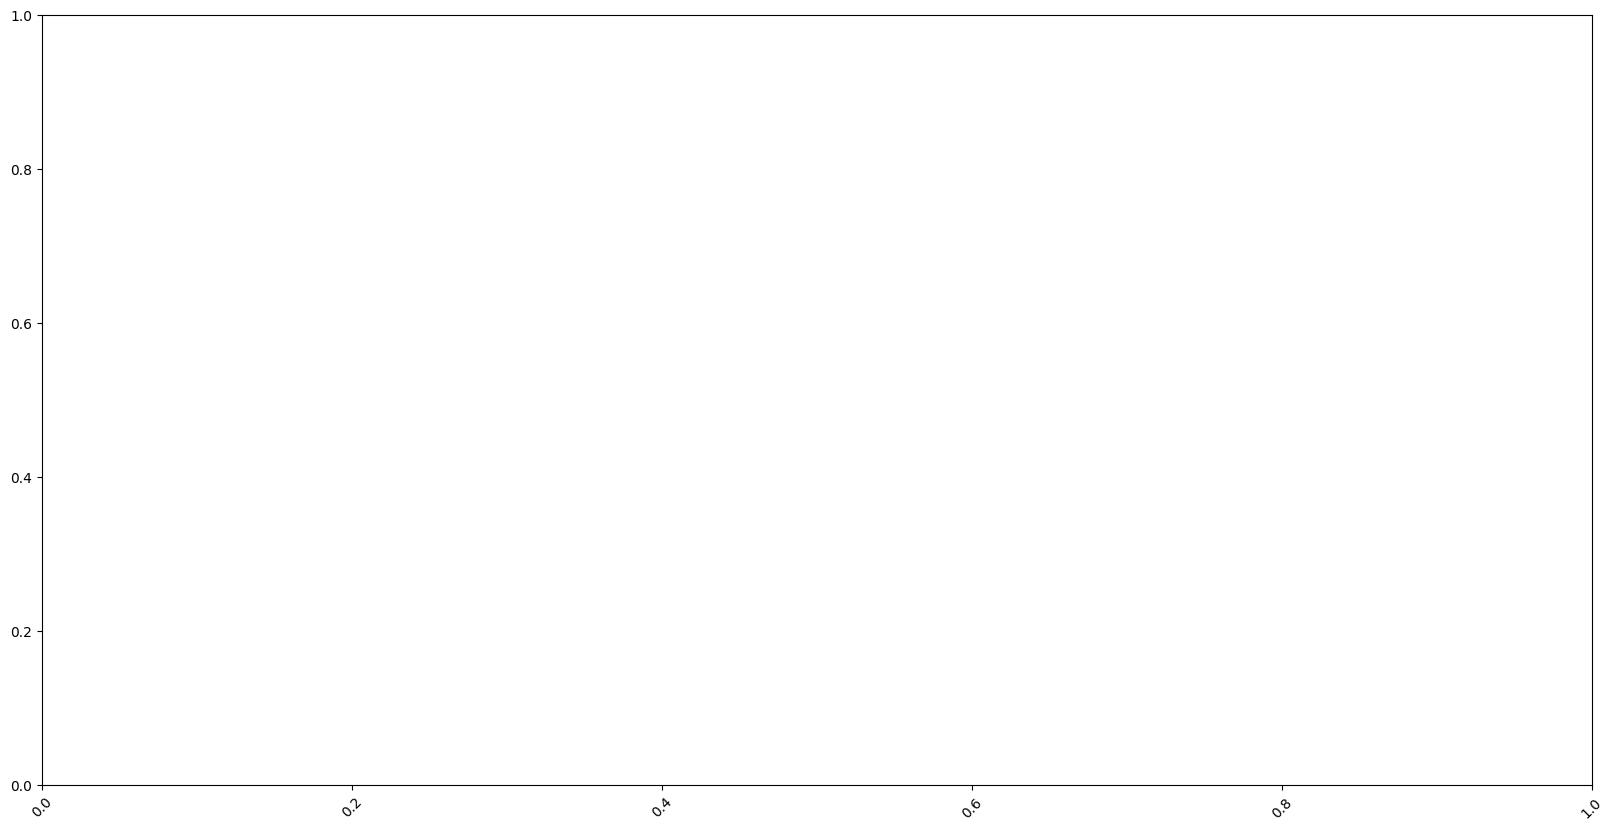

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

# Filter only status = 1
d = df.loc[df['status'] == 1]

# Select required columns
d = d[['has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']]

# Convert wide to long format
d_melted = d.melt(var_name='variable', value_name='value')

# Countplot
sns.countplot(data=d_melted, x='variable', hue='value')

plt.xticks(rotation=45)
plt.show()




In [20]:
df.describe(include = ['float64','int64'])


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


<Axes: >

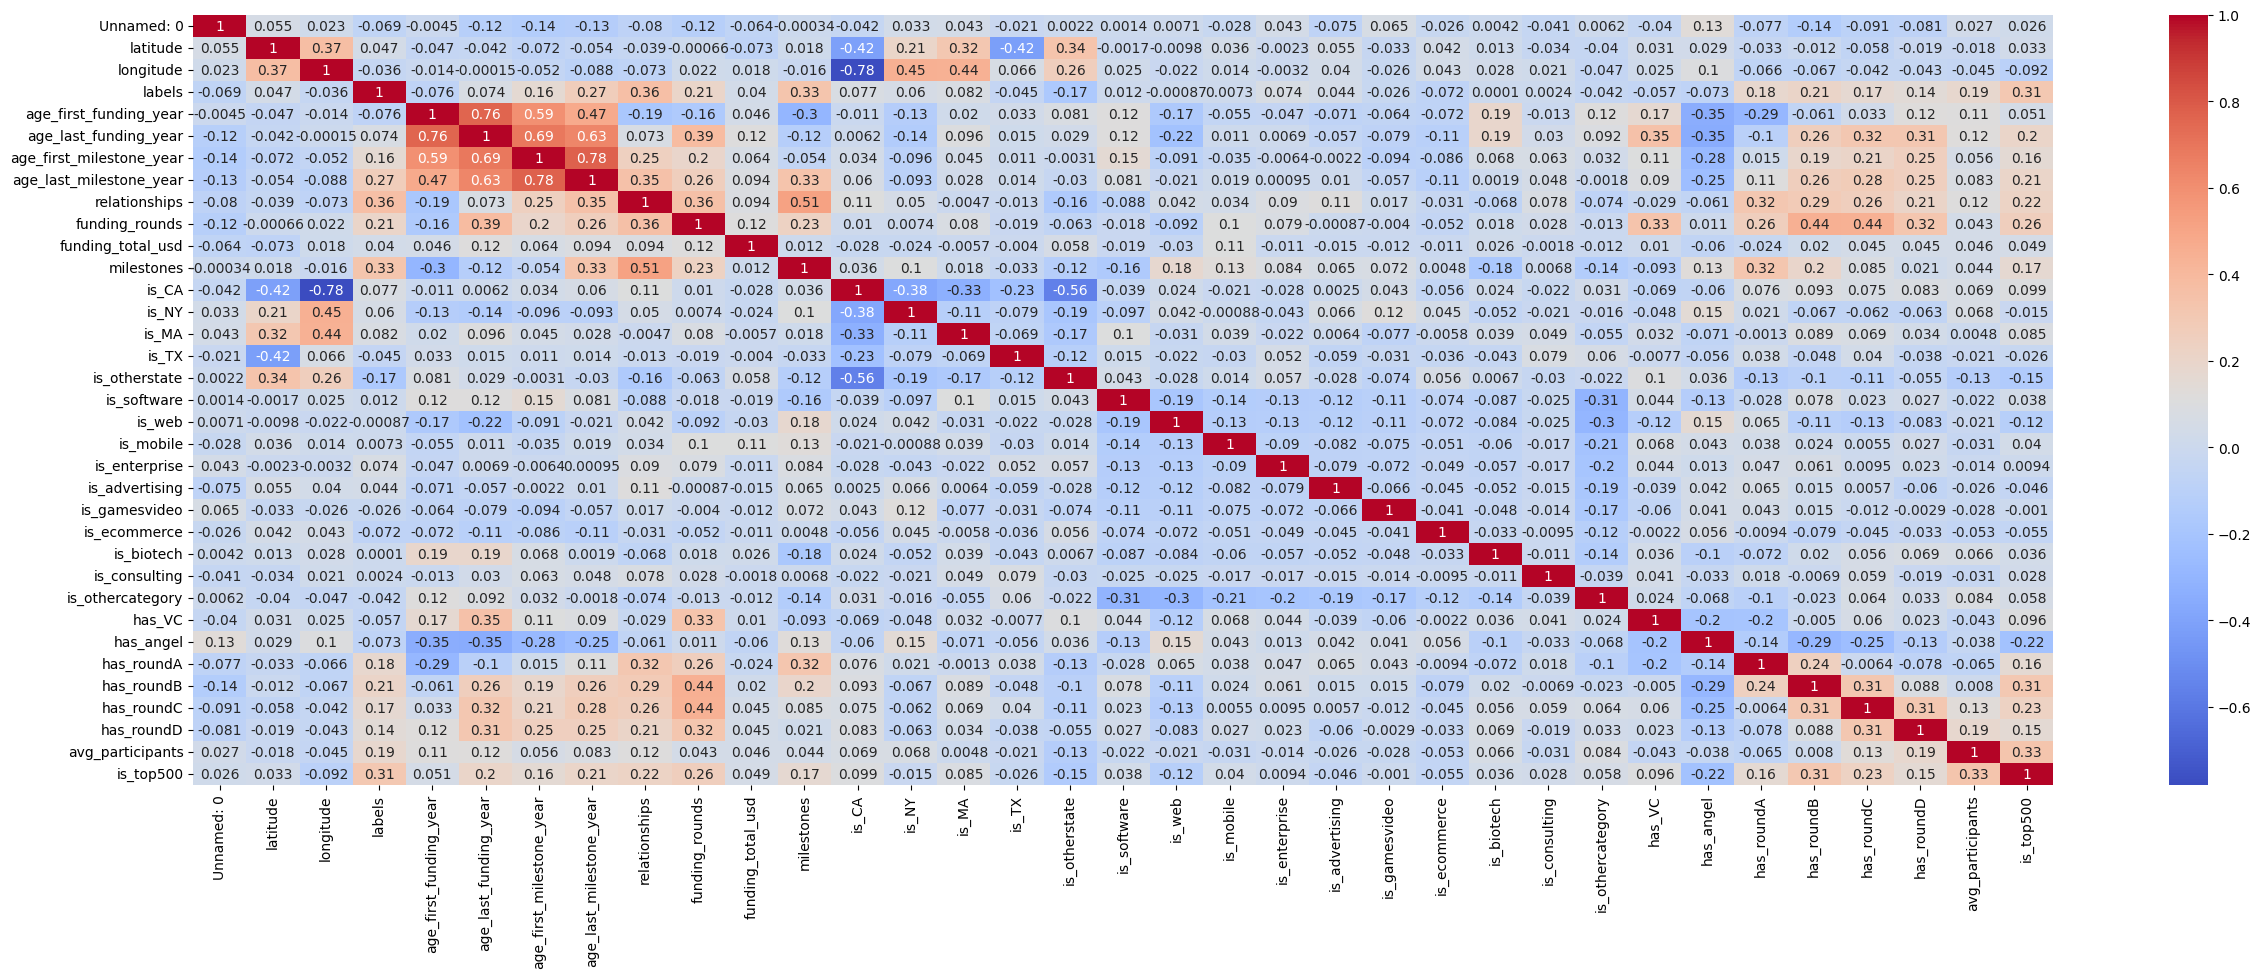

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)


In [22]:
pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [24]:

print(df['state_code'].equals(df['state_code.1']))

df_mismatch = df.loc[df['state_code'] != df['state_code.1']]
df_mismatch.style.set_properties(**{'background-color': 'yellow'}, subset=['state_code', 'state_code.1'])
state = df['state_code'].value_counts().to_frame()

col_name = state.columns[0] 
state['proportion'] = (state[col_name] / state[col_name].sum()) * 100

state

False


,count,proportion
state_code,,
CA,488,52.871073
NY,106,11.484290
MA,83,8.992416
TX,42,4.550379
WA,42,4.550379
CO,19,2.058505
IL,18,1.950163
PA,17,1.841820
VA,13,1.408451


In [25]:

df = df.drop([
    'category_code', 'is_software', 'is_web', 'is_mobile', 
    'is_enterprise', 'is_advertising', 'is_gamesvideo', 
    'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'
], axis=1, errors='ignore')


print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'object_id', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'State', 'category',
       'founded_year'],
      dtype='str')


In [26]:
# Define Features (X) and Target (y)
X = df.drop('labels', axis=1)
y = df['labels']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Select numeric features except target
X = df.select_dtypes(include=['number']).drop('labels', axis=1)
y = df['labels']

# Train test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Create GridSearch object  ✅ (This was missing in your code)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
model_rf = rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.90      0.59      0.71        73
           1       0.78      0.96      0.86       112

    accuracy                           0.81       185
   macro avg       0.84      0.77      0.79       185
weighted avg       0.83      0.81      0.80       185



In [31]:
#applying Random forest classifier
model=RandomForestClassifier()
model.fit(x_train, y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [32]:
#checking accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
test_acc = accuracy_score(y_test,y_pred_test)
train_acc = accuracy_score(y_train,y_pred_train)
print('test_acc: ', test_acc)
print('train_acc: ', train_acc)

test_acc:  0.8108108108108109
train_acc:  1.0


In [33]:
import joblib

In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('model', rf)
])

joblib.dump(pipeline, 'random_forest_model.pkl')


['random_forest_model.pkl']